# Milestone 1 Phase 2 (Modeling)

## Model Deploy Link

https://huggingface.co/spaces/AndreLie95/Phase2_Milestone1

## Introduction
### Identity
```txt
Name : Andre Lie
Class : FTDS (Offline)
Batch : 03

### Objective Statement
Make a model who can predict customers churn risk from using our products.

### Problem Statement
1. What kind of customers are our loyal customers?
2. is the number of average frequency login days and the number of average transaction values makes our costumer churn ?
3. what kind of customer membership have the highest churn rate ?
4. is sequential or functional is the best model for predict customers churn ?
5. how accurate the model we create can predict customer 

## Import Library

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn import set_config
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score
import tensorflow as tf
import warnings
import pickle

## Loading Data

In [2]:
# set general options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
set_config(display='diagram')

In [3]:
# load the dataset
df_ori = pd.read_csv('churn.csv')
df_ori

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [4]:
# copy dataset
df = df_ori.copy()

In [5]:
# look for dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

base on dataset information we get 5 features who have missing values there are gender, region_category, joined_through_referral, preferred_offer_types, and medium_of_operation.

In [6]:
# check our dataset overview
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


it's weard, if we see the days_since_last_login have minimal at -999 as we know days_since_last_login minimal is 0. so let's masking this value first before we search the correlation cause can make correlation score more better.

In [7]:
# masking values on days_since_last_login
df['days_since_last_login'].replace(to_replace=-999, value=0, inplace=True)

Column user_id, joining_date, last_visit_time is very spesific and not related to our target, so we will drop that.

In [8]:
# drop useless kolom 
df.drop(['user_id', 'joining_date', 'last_visit_time'], axis=1, inplace=True)

for make easy for processing the data, we need to sperate the data frame into numberical and categorical data.

In [9]:
# seperated data numberical and categorical
num = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
cat = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score']

## Exploratory Data Analysis (EDA)

### Search Corelations between features and target

In [10]:
# make phik matrix from dataframe
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


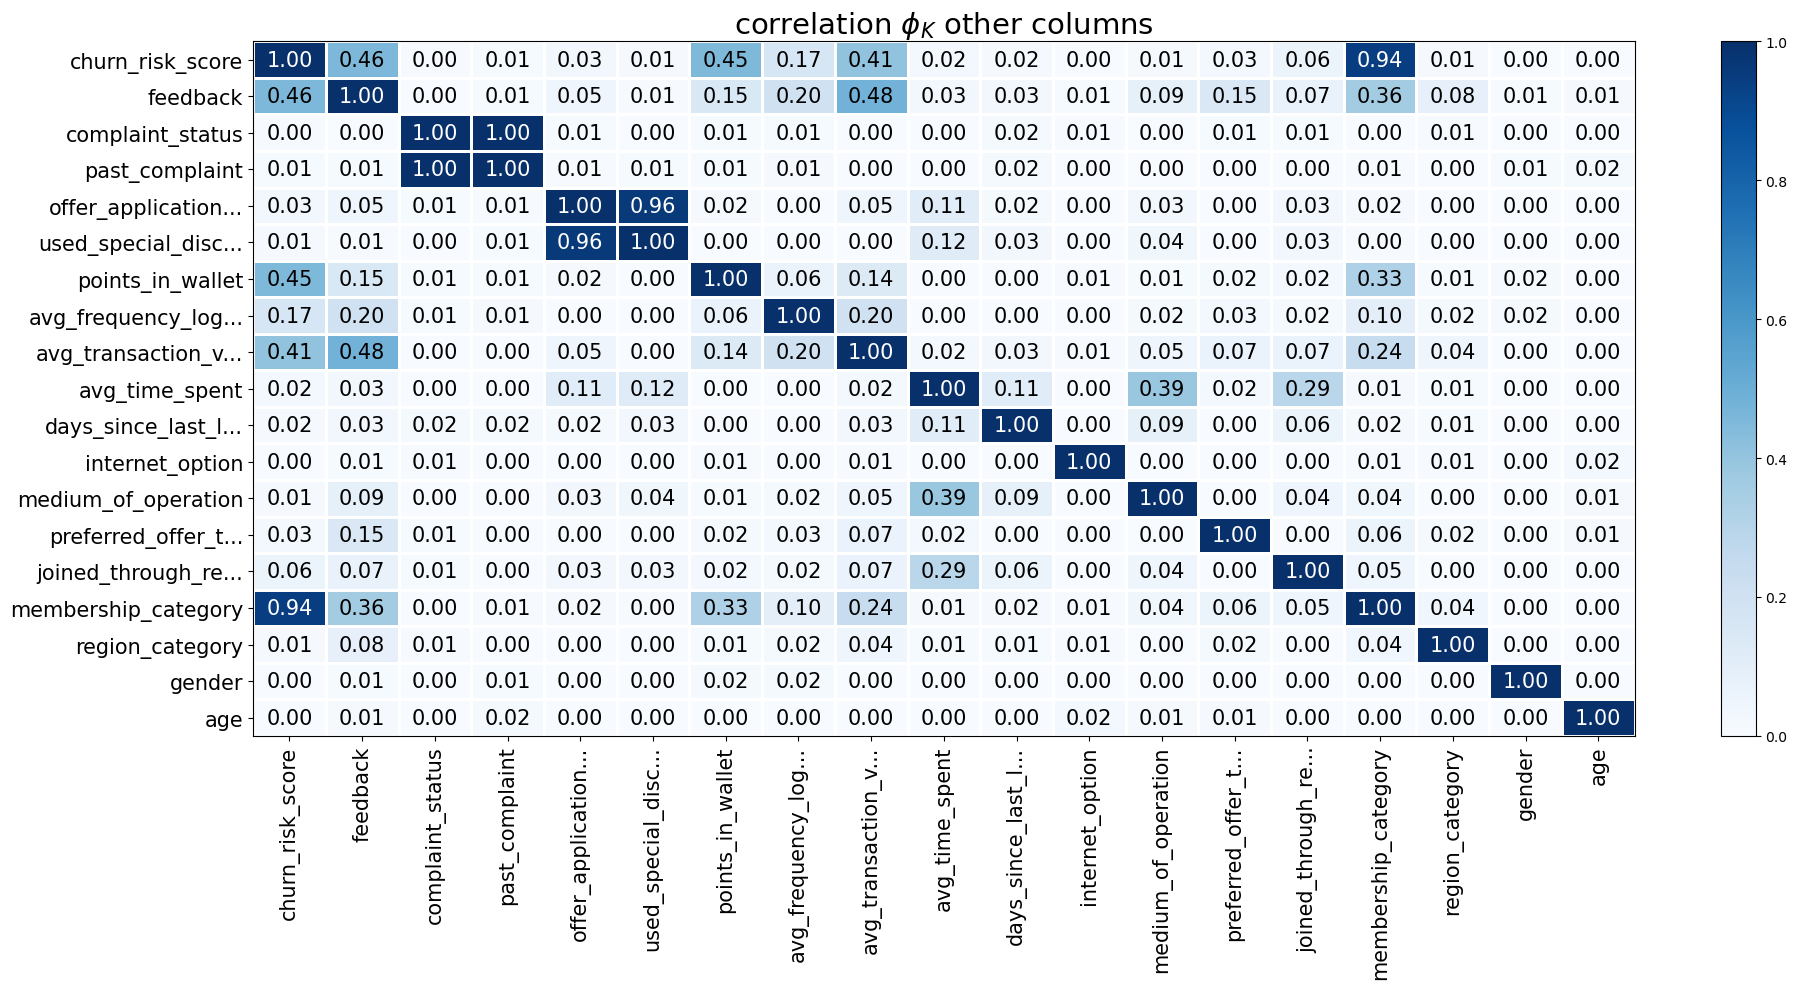

In [11]:
# plot correlation phik
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(20,10))
plt.tight_layout()

base on phik matrix the data correlated with churn is feedback, points_in_wallet, avg_frequency_login_days, avg_transaction_value, and membership_category.

1. What kind of customers are our loyal customers?

<AxesSubplot:xlabel='points_in_wallet', ylabel='avg_transaction_value'>

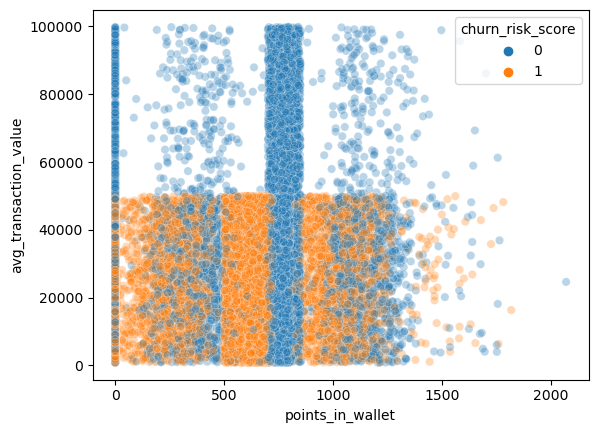

In [12]:
# plot point_in_wallet vs avg_transaction_value by churn_risk_score
sns.scatterplot(x='points_in_wallet', y='avg_transaction_value', data=df, hue='churn_risk_score', alpha=0.3)

costumers with average spent money > 50.000 and point in wallet > 500 is our loyal customer.

2. is the number of average frequency login days and the number of average transaction values makes our costumer churn ?

<AxesSubplot:xlabel='avg_frequency_login_days', ylabel='avg_transaction_value'>

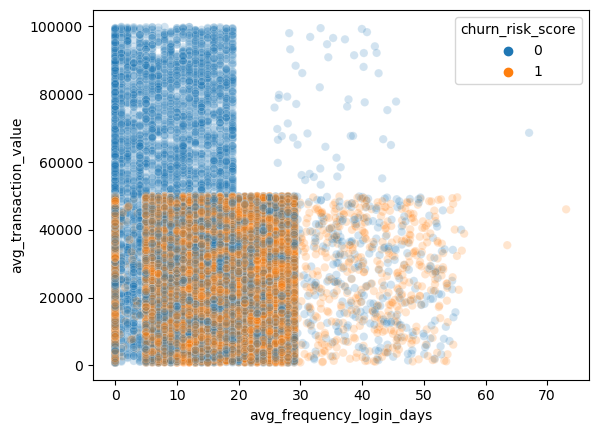

In [13]:
# plot avg_frequency_login_days vs avg_transaction_value by churn_risk_score
sns.scatterplot(x='avg_frequency_login_days', y='avg_transaction_value', data=df, hue='churn_risk_score', alpha=0.2)

base on our plot, seem like it have a pattern. costumers with average spent money > 50.000 doesn't churn even the frequency login days is low. otherwise costumer with average spent money < 50.000 will churn even the frequency login days is high.

We can say if the avg_transaction_value is related with our costumer will churn or not churn.

### Look at Data Distributions

age Skewness Level : -0.007528816521120494
age is normal distributed

days_since_last_login Skewness Level : -0.1263639525546865
days_since_last_login is normal distributed

avg_time_spent Skewness Level : 2.275921373726159
avg_time_spent is right skew

avg_transaction_value Skewness Level : 1.0107511716123325
avg_transaction_value is right skew

avg_frequency_login_days Skewness Level : 0.389538185530503
avg_frequency_login_days is normal distributed

points_in_wallet Skewness Level : -0.7738913518208214
points_in_wallet is left skew



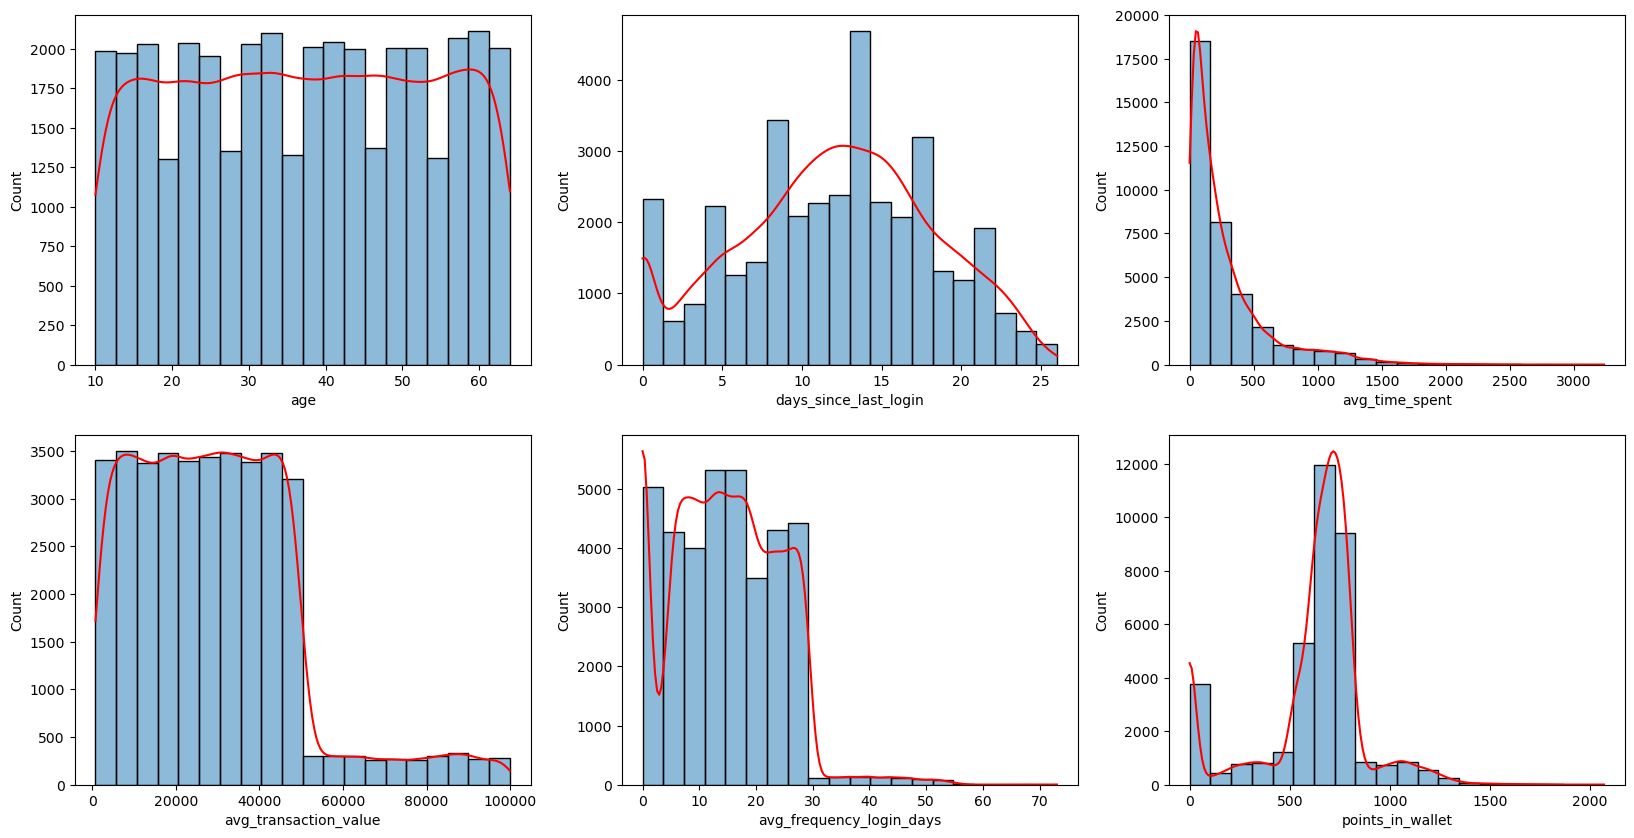

In [14]:
# plot distribusi data untuk data numberical
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()
a = 0
for c in df[num]:
    sns.histplot(data=df[c],ax=axes[a], kde=True, bins=20).lines[0].set_color('red')
    a = a+1

# menghitung dan menampilkan distribusi data
for col in df[num]:
    print(df[col].name,'Skewness Level :', df[col].skew())
    if df[col].skew() > 0.5 :
        print(df[col].name,'is right skew')
    elif df[col].skew() < -0.5 :
        print(df[col].name,'is left skew')
    else :
        print(df[col].name,'is normal distributed')
    print("")

### Search target proportion

<AxesSubplot:ylabel='churn_risk_score'>

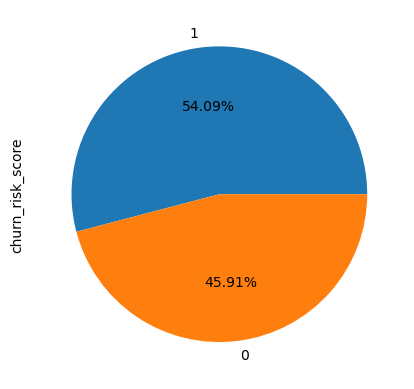

In [15]:
 # plot for check imbalance data on target
df['churn_risk_score'].value_counts().plot(kind='pie', autopct='%.2f%%')

we can say our target on dataset already balanced. so we doesn't need to handle the imblacing.

3. what kind of customer membership have the highest churn rate ?

<AxesSubplot:xlabel='membership_category,churn_risk_score'>

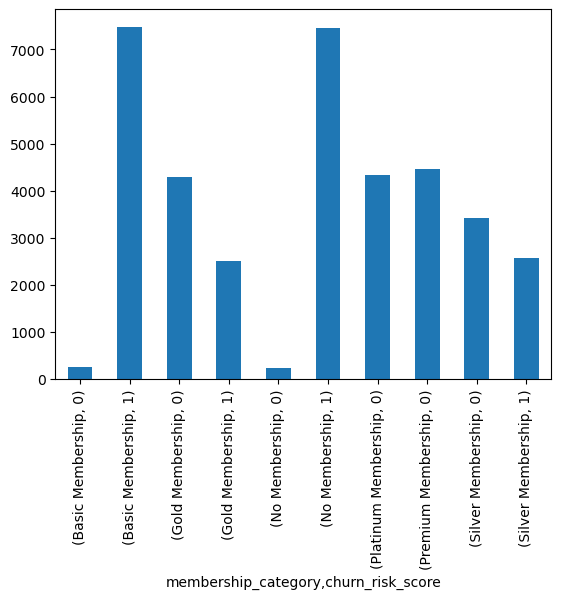

In [16]:
# plot the highest churn rate by membership
member = df.groupby('membership_category')['churn_risk_score'].value_counts().sort_index()
member.plot(kind='bar')

seem like customers without membership and basic membership has high rate to churn. we can also see if platinum and premium membership doesn't have any churn rate, so we can say that as our loyal customers.

## Data Preprocessing

### Look Multicolinearity 

In [17]:
# define VIF calculator function
def vif(c):
    vif = pd.DataFrame()
    vif['Column'] = c.columns
    vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]

    return vif

In [18]:
# search for multicolinearity between numberical features
vif(df[num])

,Column,VIF
0,age,4.829096
1,days_since_last_login,3.951625
2,avg_time_spent,1.652035
3,avg_transaction_value,2.944834
4,avg_frequency_login_days,2.953360
5,points_in_wallet,4.850721


our dataset doesn't have multicolinearity between features (not have similar information between features).

### Look Cardinality

In [19]:
# show the cardinality of our data categories
for i in df[cat]:
    print(i,df[i].nunique())

gender 2
region_category 3
membership_category 6
joined_through_referral 2
preferred_offer_types 3
medium_of_operation 3
internet_option 3
used_special_discount 2
offer_application_preference 2
past_complaint 2
complaint_status 5
feedback 9
churn_risk_score 2


since our data not more than 10 cardinality we can say if our dataset is not have high cardinality.

### Look Missing Values

In [20]:
# show missing values
df.isnull().sum()

age                                0
gender                            59
region_category                 5431
membership_category                0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

it's look like we have missing values at gender, region_category, joined_through_referral, preferred_offer_types, and medium_of_operation.
let's see what cause these columns have missing values.

In [21]:
# show precentages of missing values
(df.isnull().sum()/len(df))*100

age                              0.000000
gender                           0.159416
region_category                 14.674412
membership_category              0.000000
joined_through_referral         14.704134
preferred_offer_types            0.778168
medium_of_operation             14.577141
internet_option                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 0.000000
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64

since the missing values > 5% we need handle it with imputation methods. but based on feature correlation, the missing values is not on our correlated features, so we can handle that by drop that features on features selection.

### Look Duplicated Data

In [22]:
# search for data duplicate on our dataset
df.duplicated().value_counts()

False    36992
True        18
dtype: int64

In [23]:
# show the percentage of duplicates data
(df.duplicated().value_counts()/df.duplicated().count())*100

False    99.951364
True      0.048636
dtype: float64

our data duplicate is 0.05%, and since it doesn't more than 5% we can drop that duplicate data.

In [24]:
# drop the duplicate data by rows
df.drop_duplicates(inplace=True, ignore_index=True)

In [25]:
# crosscheck the dataset still have duplicates data or not
df.duplicated().value_counts()

False    36992
dtype: int64

now our dataset is clean from duplicate data.

### Feature Selection

base on our correlation matrix and multicolinearity check we found the best features for training models :
1. Membership Category
2. Feedback
3. Point in Wallet
4. Average Transaction Value
5. Average Frequency Login Days

In [26]:
# select the best feature for our model training
f_num = ['points_in_wallet', 'avg_frequency_login_days', 'avg_transaction_value']
f_cat_ord = ['membership_category']
f_cat_ohe = ['feedback']

### Train-Test Split / Split Dataset

In [27]:
# split dataset into train, validation and test sets
x= df[f_num+f_cat_ord+f_cat_ohe]
y= df['churn_risk_score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2895)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=2895)

In [28]:
# show the lenght of data train, validation, and test
c = ['x_train', 'x_val', 'x_test', 'y_train', 'y_val', 'y_test']
d = 0
for i in [x_train, x_val, x_test, y_train, y_val, y_test]:
    print(c[d],i.shape)
    d = d+1

x_train (20715, 5)
x_val (8878, 5)
x_test (7399, 5)
y_train (20715,)
y_val (8878,)
y_test (7399,)


now we have 3 data sets namely train, validation, and test.

## Feature Engineering

### Looking for Outlier

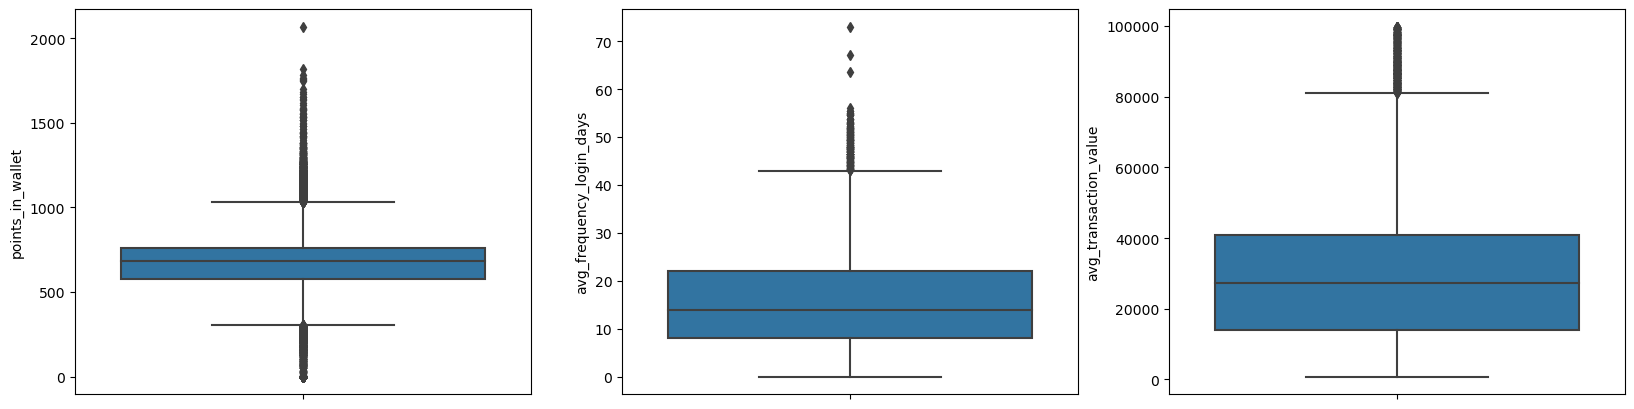

In [29]:
# check outlier in our data train
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
axes = axes.flatten()
a = 0
for c in x_train[f_num]:
    sns.boxplot(y=c ,data=x_train ,ax=axes[a], whis=1.5)
    a = a+1

based on boxplot above we can see if our features point_in_wallet, avg_frequency_login_days, avg_transactions_value have outlier, but how many percentages of outlier for each features ? let's check it.

In [30]:
# define function for determine outlier on skew distribusion data
def skewoutlier(data, col, cons):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    
    lower_bound = data[col].quantile(0.25) - (IQR * cons)
    upper_bound = data[col].quantile(0.75) + (IQR * cons)
    
    return lower_bound, upper_bound

In [31]:
# define function for determine outlier on normal distribusion data
def normoutlier(data, col):
    lower_bound = data[col].mean() - 3*data[col].std()
    upper_bound = data[col].mean() + 3*data[col].std()
    
    return lower_bound, upper_bound

In [32]:
# search percentage of outlier on skew distribution data
for i in x_train[['avg_transaction_value', 'points_in_wallet']]:
    lower_bound, upper_bound = skewoutlier(data=x_train, col=i, cons=1.5)
    percentage_outlier_train = (x_train[i][(x_train[i] < lower_bound) | (x_train[i] > upper_bound)].count())/(x_train[i].count())*100
    print(f'percentage f_train {i} outlier :', percentage_outlier_train, '%')

percentage f_train avg_transaction_value outlier : 3.031619599324161 %
percentage f_train points_in_wallet outlier : 17.93869176924934 %


In [33]:
# search percentage of outlier on normal distribution data
lower_bound, upper_bound = normoutlier(data=x_train, col='avg_frequency_login_days')
percentage_outlier_train = (x_train['avg_frequency_login_days'][(x_train['avg_frequency_login_days'] < lower_bound) | (x_train['avg_frequency_login_days'] > upper_bound)].count())/(x_train['avg_frequency_login_days'].count())*100
print(f'percentage f_train avg_frequency_login_days outlier :', percentage_outlier_train, '%')

percentage f_train avg_frequency_login_days outlier : 0.8592807144581222 %


since we get the percentage of each feature outlier, we need to handle that if >5% cause can reduce the performance of model. but on this case i will handle all of them.

### Handling Outlier

In [34]:
# capping outlier on skew distribution features
winsor1 = Winsorizer(capping_method='iqr',
                    tail='both',
                    fold=1.5,
                    variables=['avg_transaction_value', 'points_in_wallet'])

x_train = winsor1.fit_transform(x_train)

In [35]:
# capping outlier on normal distribution features
winsor2 = Winsorizer(capping_method='gaussian',
                    tail='both',
                    fold=3,
                    variables=['avg_frequency_login_days'])

x_train = winsor2.fit_transform(x_train)

In [36]:
# cross check percentage the outlier on skew distribution
for i in x_train[['avg_transaction_value', 'points_in_wallet']]:
    lower_bound, upper_bound = skewoutlier(data=x_train, col=i, cons=1.5)
    percentage_outlier_train = (x_train[i][(x_train[i] < lower_bound) | (x_train[i] > upper_bound)].count())/(x_train[i].count())*100
    print(f'percentage f_train {i} outlier :', percentage_outlier_train, '%')

percentage f_train avg_transaction_value outlier : 0.0 %
percentage f_train points_in_wallet outlier : 0.0 %


In [37]:
# cross check percentage the outlier on normal distribution
lower_bound, upper_bound = normoutlier(data=x_train, col='avg_frequency_login_days')
percentage_outlier_train = (x_train['avg_frequency_login_days'][(x_train['avg_frequency_login_days'] < lower_bound) | (x_train['avg_frequency_login_days'] > upper_bound)].count())/(x_train['avg_frequency_login_days'].count())*100
print(f'percentage f_train avg_frequency_login_days outlier :', percentage_outlier_train, '%')

percentage f_train avg_frequency_login_days outlier : 0.8882452329230026 %


After we handle the outlier, the data with normal distribution still have outlier. that because the mean of data get changed when we cap the outlier data. so that's make a new outlier base on new mean.

### Create a preprocessing pipeline

In [38]:
# make pipeline to preprocessing our data
membership_order = ['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Platinum Membership', 'Premium Membership']
num_pipeline = Pipeline([('scaling', MinMaxScaler())])
cat_ord_pipeline = Pipeline([('ord_enc', OrdinalEncoder())])
cat_ohe_pipeline = Pipeline([('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore', categories=[membership_order]))])

prep_pipeline = ColumnTransformer(transformers=[('num', num_pipeline, f_num),
                                               ('cat_ord', cat_ord_pipeline, f_cat_ord),
                                               ('cat_ohe', cat_ohe_pipeline, f_cat_ohe)])

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaling', MinMaxScaler())]),
                                 ['points_in_wallet',
                                  'avg_frequency_login_days',
                                  'avg_transaction_value']),
                                ('cat_ord',
                                 Pipeline(steps=[('ord_enc',
                                                  OrdinalEncoder())]),
                                 ['membership_category']),
                                ('cat_ohe',
                                 Pipeline(steps=[('ohe_enc',
                                                  OneHotEncoder(categories=[['No '
                                                                             'Membership',
                                                                             'Basic '
                                                                             'Membership',
                                                                             'Silver '
                                                                             'Membership',
                                                                             'Gold '
                                                                             'Membership',
                                                                             'Platinum '
                                                                             'Membership',
                                                                             'Premium '
                                                                             'Membership']],
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['feedback'])])

since our numberical data have skew and normal distribution but skew features is more than normal feature, i decided to use minmaxscaler as my scaler. and i split my categorical data into ordinal dan nominal cause more better encode them using they behaviors.

### Feature Scaling & Encoding

In [39]:
# transform our data sets
x_train_final = prep_pipeline.fit_transform(x_train)
x_val_final = prep_pipeline.transform(x_val)
x_test_final = prep_pipeline.transform(x_test)

now our data is ready to use in model.

## Model Pipeline

In [40]:
# settings random lock for shuffling data
tf.random.set_seed(2895)

# set a pipeline for TensorFlow tranformation
train_pipe = tf.data.Dataset.from_tensor_slices((x_train_final, y_train)).shuffle(1000).batch(256).prefetch(buffer_size=tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((x_val_final, y_val)).batch(256).prefetch(buffer_size=tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((x_test_final, y_test)).batch(256).prefetch(buffer_size=tf.data.AUTOTUNE)

now we have transformed our dataset

## Model Definition

In [41]:
# define parameters for calculation neuron in hidden layer
alp = 2
inp = x_train_final.shape[1]
out = 1
hid = int(len(x_train_final)/(alp*(inp+out)))

In [42]:
# Define Sequential Model's Architecture
model_seq = tf.keras.models.Sequential([
                                        tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
                                        tf.keras.layers.Dense(hid, activation='relu'),
                                        tf.keras.layers.Dense(hid/2, activation='relu'),
                                        tf.keras.layers.Dense(hid/4, activation='relu'),
                                        tf.keras.layers.Dense(out, activation='sigmoid')
                                        ])
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 941)               10351     
                                                                 
 dense_2 (Dense)             (None, 470)               442740    
                                                                 
 dense_3 (Dense)             (None, 235)               110685    
                                                                 
 dense_4 (Dense)             (None, 1)                 236       
                                                                 
Total params: 564,122
Trainable params: 564,122
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Define Functional Model's Architecture
input_lyr = tf.keras.layers.Input(shape=(x_train_final.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
layers = tf.keras.layers.Dense(hid, activation='relu')(layers)
layers = tf.keras.layers.Dense(hid/2, activation='relu')(layers)
layers = tf.keras.layers.Dense(hid/4, activation='relu')(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func = tf.keras.models.Model(inputs=input_lyr,outputs=output)

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 941)               10351     
                                                                 
 dense_7 (Dense)             (None, 470)               442740    
                                                                 
 dense_8 (Dense)             (None, 235)               110685    
                                                                 
 dense_9 (Dense)             (None, 1)                 236       
                                                                 
Total params: 564,122
Trainable params: 564,122
Non-trainable

In [44]:
# Define Training Configuration (Optimizer, Loss, Metrics)
model_seq.compile(
                  optimizer=tf.keras.optimizers.Adam(), # Optimizer
                  loss='binary_crossentropy', # Loss function to minimize   
                  metrics='Accuracy' # metrics to monitor
                  )

model_func.compile(
                  optimizer=tf.keras.optimizers.Adam(), # Optimizer
                  loss='binary_crossentropy', # Loss function to minimize   
                  metrics='Accuracy' # metrics to monitor
                  )

## Model Training

In [45]:
# Train sequence model
model_seq_train = model_seq.fit(train_pipe,
                                epochs=50,
                                validation_data=(val_pipe)
                                )

Epoch 1/50
81/81 [==============================] - 2s 8ms/step - loss: 0.5200 - Accuracy: 0.7477 - val_loss: 0.4243 - val_Accuracy: 0.8493
Epoch 2/50
81/81 [==============================] - 0s 5ms/step - loss: 0.3480 - Accuracy: 0.8557 - val_loss: 0.3361 - val_Accuracy: 0.8351
Epoch 3/50
81/81 [==============================] - 0s 5ms/step - loss: 0.2952 - Accuracy: 0.8625 - val_loss: 0.2807 - val_Accuracy: 0.8609
Epoch 4/50
81/81 [==============================] - 0s 5ms/step - loss: 0.2724 - Accuracy: 0.8825 - val_loss: 0.2642 - val_Accuracy: 0.9005
Epoch 5/50
81/81 [==============================] - 0s 5ms/step - loss: 0.2625 - Accuracy: 0.8902 - val_loss: 0.2684 - val_Accuracy: 0.8951
Epoch 6/50
81/81 [==============================] - 0s 5ms/step - loss: 0.2495 - Accuracy: 0.8968 - val_loss: 0.2680 - val_Accuracy: 0.9031
Epoch 7/50
81/81 [==============================] - 0s 5ms/step - loss: 0.2491 - Accuracy: 0.8940 - val_loss: 0.2674 - val_Accuracy: 0.9067
Epoch 8/50
81/81 [==

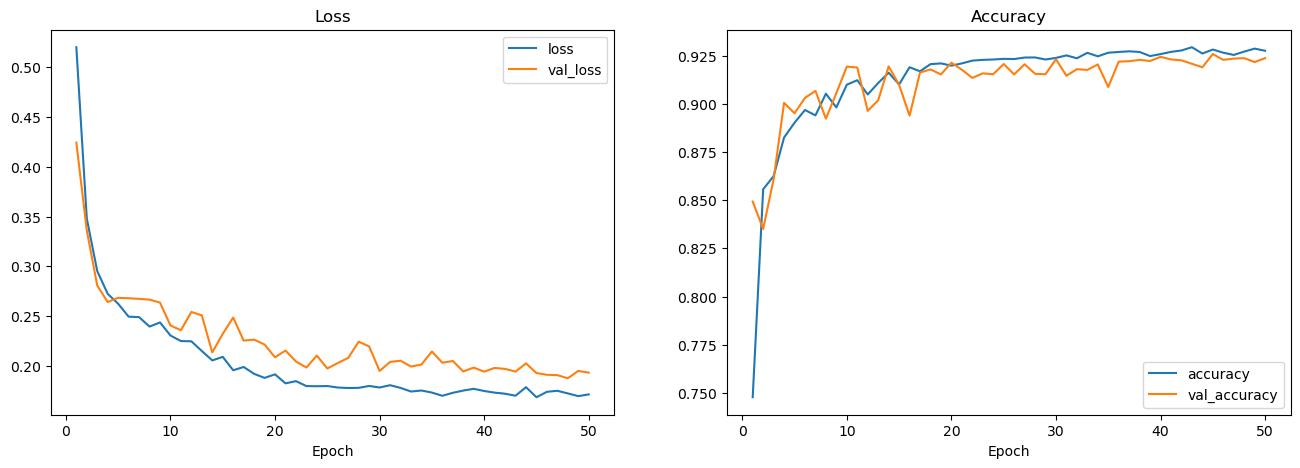

In [46]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_seq_train.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),model_seq_train.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),model_seq_train.history['Accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),model_seq_train.history['val_Accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

sequential models we have create still have gradient descent exploding. so we need to improve this model.

In [47]:
# Train function model
model_func_train = model_func.fit(train_pipe,
                                  epochs=50,
                                  validation_data=(val_pipe)
                                  )

Epoch 1/50
81/81 [==============================] - 1s 8ms/step - loss: 0.5315 - Accuracy: 0.7313 - val_loss: 0.4548 - val_Accuracy: 0.8074
Epoch 2/50
81/81 [==============================] - 0s 5ms/step - loss: 0.3970 - Accuracy: 0.8347 - val_loss: 0.3630 - val_Accuracy: 0.8618
Epoch 3/50
81/81 [==============================] - 0s 5ms/step - loss: 0.3065 - Accuracy: 0.8681 - val_loss: 0.2834 - val_Accuracy: 0.8791
Epoch 4/50
81/81 [==============================] - 0s 5ms/step - loss: 0.2654 - Accuracy: 0.8801 - val_loss: 0.2661 - val_Accuracy: 0.8758
Epoch 5/50
81/81 [==============================] - 0s 5ms/step - loss: 0.2478 - Accuracy: 0.8824 - val_loss: 0.2700 - val_Accuracy: 0.8753
Epoch 6/50
81/81 [==============================] - 0s 6ms/step - loss: 0.2400 - Accuracy: 0.8889 - val_loss: 0.2591 - val_Accuracy: 0.8803
Epoch 7/50
81/81 [==============================] - 0s 6ms/step - loss: 0.2405 - Accuracy: 0.8844 - val_loss: 0.2642 - val_Accuracy: 0.8769
Epoch 8/50
81/81 [==

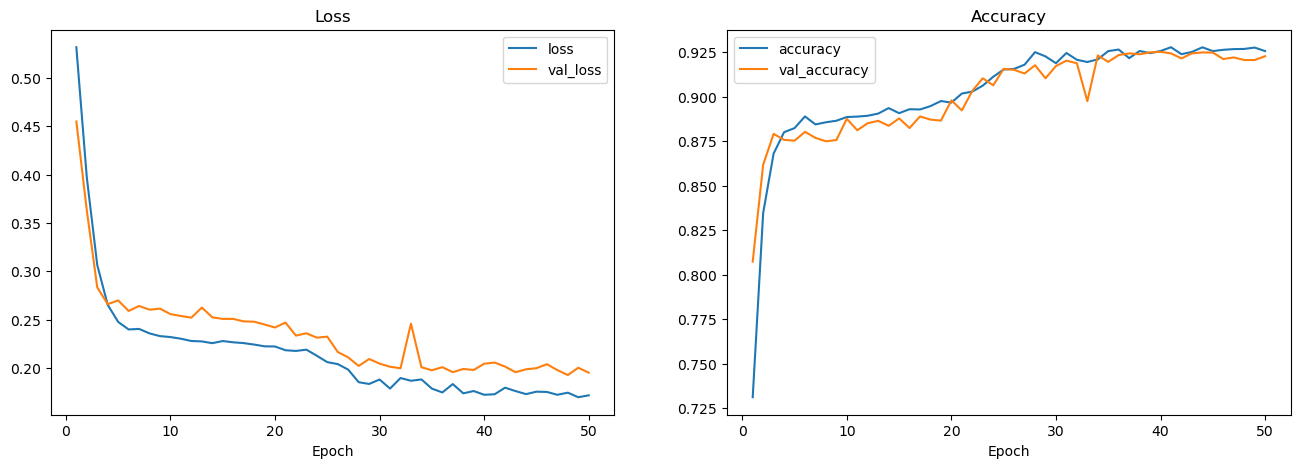

In [48]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_func_train.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),model_func_train.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),model_func_train.history['Accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),model_func_train.history['val_Accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

functional models we have create still have gradient descent exploding. so we need to improve this model.

## Model Improvement

In [49]:
# Define Sequential Model's Architecture
model_seq_tunning = tf.keras.models.Sequential([
                                                tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
                                                tf.keras.layers.Dense(hid, activation='relu'),
                                                tf.keras.layers.BatchNormalization(),
                                                tf.keras.layers.Dense(hid/2, activation='relu'),
                                                tf.keras.layers.BatchNormalization(),
                                                tf.keras.layers.Dense(hid/4, activation='relu'),
                                                tf.keras.layers.Dropout(0.2),
                                                tf.keras.layers.Dense(out, activation='sigmoid')
                                                ])
model_seq_tunning.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 941)               10351     
                                                                 
 batch_normalization (BatchN  (None, 941)              3764      
 ormalization)                                                   
                                                                 
 dense_12 (Dense)            (None, 470)               442740    
                                                                 
 batch_normalization_1 (Batc  (None, 470)              1880      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 235)              

In [50]:
# Define Functional Model's Architecture
input_lyr = tf.keras.layers.Input(shape=(x_train_final.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid/2, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid/4, activation='relu')(layers)
layers = tf.keras.layers.Dropout(0.2)(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func_tunning = tf.keras.models.Model(inputs=input_lyr,outputs=output)

model_func_tunning.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 941)               10351     
                                                                 
 batch_normalization_3 (Batc  (None, 941)              3764      
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 470)               4427

In [51]:
# Define Training Tunning Configuration (Optimizer, Loss, Metrics)
model_seq_tunning.compile(
                          optimizer=tf.keras.optimizers.Adam(), # Optimizer
                          loss='binary_crossentropy', # Loss function to minimize   
                          metrics='Accuracy' # metrics to monitor
                          )

model_func_tunning.compile(
                           optimizer=tf.keras.optimizers.Adam(), # Optimizer
                           loss='binary_crossentropy', # Loss function to minimize   
                           metrics='Accuracy' # metrics to monitor
                           )

In [52]:
# Train sequence model Tunning
model_seq_train_tunning = model_seq_tunning.fit(train_pipe,
                                                epochs=30,
                                                validation_data=(val_pipe)
                                                )

Epoch 1/30
81/81 [==============================] - 2s 10ms/step - loss: 0.3154 - Accuracy: 0.8751 - val_loss: 0.5922 - val_Accuracy: 0.6695
Epoch 2/30
81/81 [==============================] - 1s 8ms/step - loss: 0.2369 - Accuracy: 0.9085 - val_loss: 0.6756 - val_Accuracy: 0.6176
Epoch 3/30
81/81 [==============================] - 1s 8ms/step - loss: 0.2271 - Accuracy: 0.9083 - val_loss: 0.8824 - val_Accuracy: 0.5247
Epoch 4/30
81/81 [==============================] - 1s 8ms/step - loss: 0.2134 - Accuracy: 0.9157 - val_loss: 0.7263 - val_Accuracy: 0.6783
Epoch 5/30
81/81 [==============================] - 1s 9ms/step - loss: 0.2102 - Accuracy: 0.9142 - val_loss: 0.7246 - val_Accuracy: 0.7525
Epoch 6/30
81/81 [==============================] - 1s 8ms/step - loss: 0.1967 - Accuracy: 0.9194 - val_loss: 0.6408 - val_Accuracy: 0.7422
Epoch 7/30
81/81 [==============================] - 1s 8ms/step - loss: 0.1974 - Accuracy: 0.9181 - val_loss: 0.3116 - val_Accuracy: 0.8751
Epoch 8/30
81/81 [=

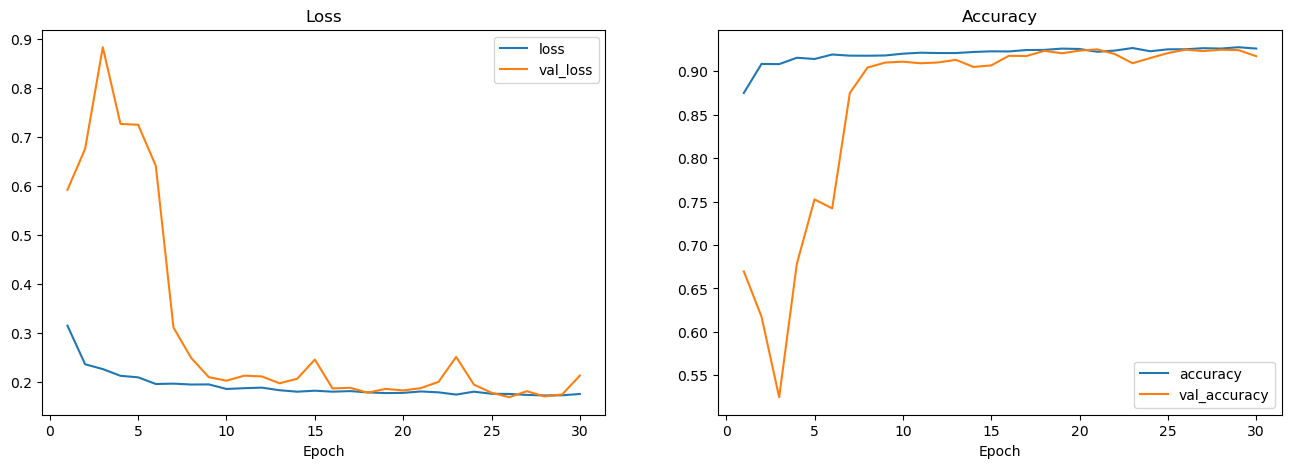

In [53]:
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_seq_train_tunning.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),model_seq_train_tunning.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),model_seq_train_tunning.history['Accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),model_seq_train_tunning.history['val_Accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

sequential model after we tunning using batch normalization, dropout, and reduce epoch to 30. we got the model show exploding gradient at epoch 15 and 30 from data loss. so this model is not good to use for predict the results.

In [54]:
# Train functional model Tunning
model_func_train_tunning = model_func_tunning.fit(train_pipe,
                                                  epochs=30,
                                                  validation_data=(val_pipe)
                                                  )

Epoch 1/30
81/81 [==============================] - 2s 14ms/step - loss: 0.3657 - Accuracy: 0.8343 - val_loss: 1.1754 - val_Accuracy: 0.4624
Epoch 2/30
81/81 [==============================] - 1s 10ms/step - loss: 0.2783 - Accuracy: 0.8755 - val_loss: 1.3772 - val_Accuracy: 0.4624
Epoch 3/30
81/81 [==============================] - 1s 10ms/step - loss: 0.2398 - Accuracy: 0.9040 - val_loss: 1.0455 - val_Accuracy: 0.4624
Epoch 4/30
81/81 [==============================] - 1s 10ms/step - loss: 0.2224 - Accuracy: 0.9087 - val_loss: 0.6758 - val_Accuracy: 0.5608
Epoch 5/30
81/81 [==============================] - 1s 10ms/step - loss: 0.2124 - Accuracy: 0.9142 - val_loss: 0.4186 - val_Accuracy: 0.7507
Epoch 6/30
81/81 [==============================] - 1s 10ms/step - loss: 0.2049 - Accuracy: 0.9159 - val_loss: 0.2258 - val_Accuracy: 0.9066
Epoch 7/30
81/81 [==============================] - 1s 11ms/step - loss: 0.1999 - Accuracy: 0.9167 - val_loss: 0.2086 - val_Accuracy: 0.9110
Epoch 8/30
81

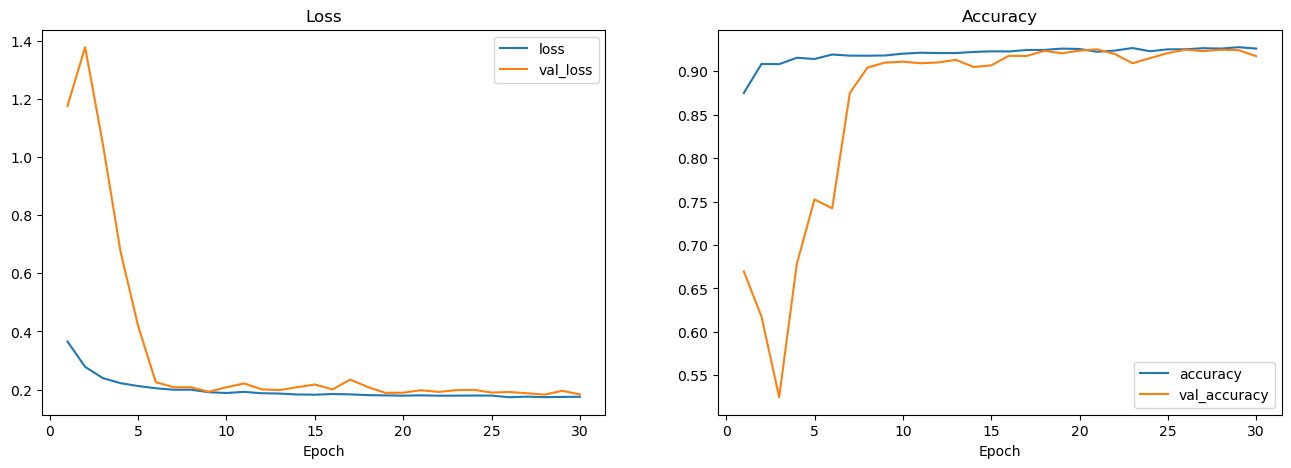

In [55]:
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_func_train_tunning.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),model_func_train_tunning.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),model_seq_train_tunning.history['Accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),model_seq_train_tunning.history['val_Accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Functional model after we tunning using batch normalization, dropout, and reduce epoch to 30. we got the model show more smooth gradient than before tunning. its mean our model is not overfit or underfit, so this model can be use as our predict model.

## Model Predictions

In [72]:
# make a prediction using test sets
y_prob_seq = model_seq.predict(x_test_final)
y_pred_seq = np.round(y_prob_seq)

y_prob_seq_tunning = model_seq_tunning.predict(x_test_final)
y_pred_seq_tunning = np.round(y_prob_seq_tunning)

y_prob_func = model_func.predict(x_test_final)
y_pred_func = np.round(y_prob_func)

y_prob_func_tunning = model_func_tunning.predict(x_test_final)
y_pred_func_tunning = np.round(y_prob_func_tunning)

232/232 [==============================] - 1s 2ms/step


## Model Evaluation

In [66]:
# evaluate model using test sets
model_seq_eval = model_seq.evaluate(test_pipe)
model_seq_tunning_eval = model_seq_tunning.evaluate(test_pipe)
model_func_eval = model_func.evaluate(test_pipe)
model_func_tunning_eval = model_func_tunning.evaluate(test_pipe)

print(f'model seq (loss : {model_seq_eval[0]} |', f'accuracy : {model_seq_eval[1]})')
print(f'model seq tunning (loss : {model_seq_tunning_eval[0]} |', f'accuracy : {model_seq_tunning_eval[1]})')
print(f'model func (loss : {model_func_eval[0]} |', f'accuracy : {model_func_eval[1]})')
print(f'model func tunning (loss : {model_func_tunning_eval[0]} |', f'accuracy : {model_func_tunning_eval[1]})')

29/29 [==============================] - 0s 3ms/step - loss: 0.1830 - Accuracy: 0.9258
model seq (loss : 0.19757932424545288 | accuracy : 0.9232328534126282)
model seq tunning (loss : 0.21627771854400635 | accuracy : 0.9148533344268799)
model func (loss : 0.19369351863861084 | accuracy : 0.9236383438110352)
model func tunning (loss : 0.18301129341125488 | accuracy : 0.9236383438110352)


In [79]:
# show classification report of all model predictions
print('Sequential Model')
print(classification_report(y_test,y_pred_seq))
print('AUC:',roc_auc_score(y_test,y_prob_seq))
print('')
print('Sequential Tunning Model')
print(classification_report(y_test,y_pred_seq_tunning))
print('AUC:',roc_auc_score(y_test,y_prob_seq_tunning))
print('')
print('Functional Model')
print(classification_report(y_test,y_pred_func))
print('AUC:',roc_auc_score(y_test,y_prob_func))
print('')
print('Functional Tunning Model')
print(classification_report(y_test,y_pred_func_tunning))
print('AUC:',roc_auc_score(y_test,y_prob_func_tunning))

Sequential Model
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3335
           1       0.91      0.95      0.93      4064

    accuracy                           0.92      7399
   macro avg       0.93      0.92      0.92      7399
weighted avg       0.92      0.92      0.92      7399

AUC: 0.9705771745032995

Sequential Tunning Model
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3335
           1       0.94      0.90      0.92      4064

    accuracy                           0.91      7399
   macro avg       0.91      0.92      0.91      7399
weighted avg       0.92      0.91      0.92      7399

AUC: 0.9694066229680435

Functional Model
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3335
           1       0.93      0.93      0.93      4064

    accuracy                           0.92      7399
   macro avg       

4. is sequential or functional is the best model for predict customers churn ?

the best model we can use for predict our customers will churn or not is the functional tunning model, it can be showed by score F1-score and accurary are the highest compared with other models. so the best model we have is Functional Tunning Model for overall score (F1-score & Accuracy).
for other model, it's already good too because already have >0.90 point for overall score.

5. how accurate the model we create can predict customer 

the best model i create have 93% accuracy to predict customer churn.

## Model Saving

In [82]:
# Save pipeline process
with open("pipeline.pkl", "wb") as pipeline:
    pickle.dump(prep_pipeline, pipeline)
    
# save model
model_func_tunning.save('best_model.h5')

## Conclusion

1. costumers with average spent money > 50.000 and point in wallet > 500 is our loyal customer.
2. costumers with average spent money > 50.000 doesn't churn even the frequency login days is low. otherwise costumer with average spent money < 50.000 will churn even the frequency login days is high. We can say if the avg_transaction_value is related with our costumer will churn or not churn.
3. customers without membership and basic membership has high rate to churn. but customer with platinum and premium membership doesn't have any churn rate, so we can say that as our loyal customers.
4. the best model we can use for predict our customers will churn or not is the functional tunning model
5. the best model created have 93% accuracy to predict customer churn.